In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv('car_evaluation.csv',
names=['buying', 'maint', 'doors', 'lug_boot', 'safety', 'class'])
df

,buying,maint,doors,lug_boot,safety,class
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
low,low,5more,more,med,med,good
low,low,5more,more,med,high,vgood
low,low,5more,more,big,low,unacc
low,low,5more,more,big,med,good


In [146]:
# Encoding all the string data
df = df.apply(LabelEncoder().fit_transform)

In [168]:
# Define features (X) and target variable (y) using column names
X = df.drop(columns=['class'])  # Drop the target column from the features
y = df['class'].astype(str)  # Select the target column

In [150]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [154]:
# Train the classifier on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [156]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [158]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.7254335260115607


In [160]:
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion)


Confusion Matrix:
 [[ 43   5  28   7]
 [ 10   1   0   0]
 [ 28   0 207   0]
 [ 17   0   0   0]]


In [162]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.52      0.48        83
           1       0.17      0.09      0.12        11
           2       0.88      0.88      0.88       235
           3       0.00      0.00      0.00        17

    accuracy                           0.73       346
   macro avg       0.37      0.37      0.37       346
weighted avg       0.71      0.73      0.72       346



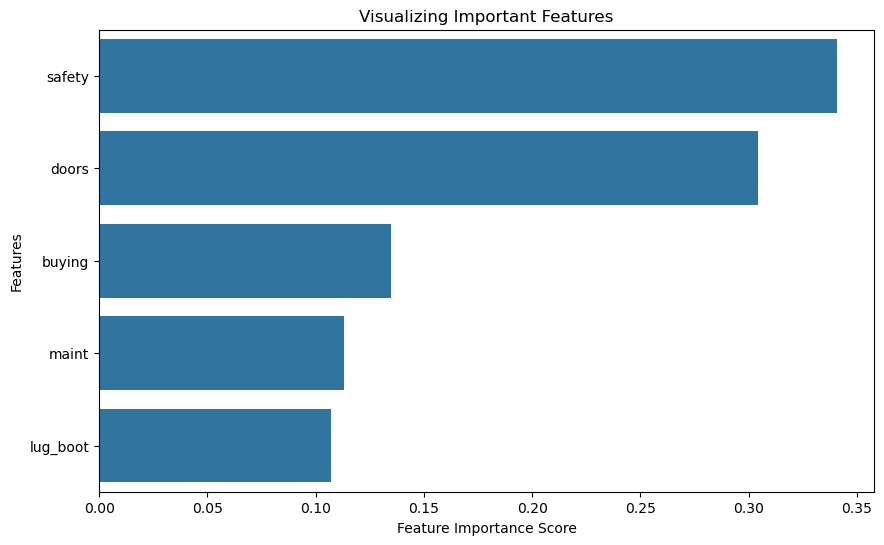

In [116]:
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()